Hello
Below you will find a tutorial on how to use ATLAS_Parser - a tool made for working with ATLAS Open Data

We will start by importing and initializing configurations

In [ ]:
#Import the tools
from src.parse_atlas import parser
from src.calculations import physics_calcs, combinatorics
import math, awkward as ak, numpy as np
import atlasopenmagic as atom
import matplotlib.pyplot as plt
import os

In [ ]:
#Configurations
config_parser = {
    "chunk_yield_threshold_bytes": 500_000_000,
    "max_threads": 3,
    "release_years": [],
    "limit_files_per_year": 5,
    "logging_path": "tutorial/logs/",
    "output_path": "tutorial/data/root_files/",
    "is_initialize_statistics": True
}

config_kinematic_cuts = {
    "pt":{"min": 0},
    "eta":{"min": -5,"max": 5},
    "phi":{"min": -math.pi, "max": math.pi}
}

config_particle_counts = {
    "Electrons" : {"min":1, "max": 6},
    "Jets" : {"min":2, "max": 8},
    "Muons" : {"min":1, "max": 6},
    "Photons" : {"min":0, "max": 5}
}

Start by initilazing the ATLAS_Parser class.

All available releases in ATLAS Open Data would also be displayed

In [ ]:
#Initializing the parser with configuration
atlasparser = parser.ATLAS_Parser(
        chunk_yield_threshold_bytes=config_parser["chunk_yield_threshold_bytes"],
        max_threads=config_parser["max_threads"],
        logging_path=config_parser["logging_path"],
        is_initialize_statistics=config_parser["is_initialize_statistics"],
        release_years=config_parser["release_years"]
        )

Available releases:
2016e-8tev           2016 Open Data for education release of 8 TeV proton-proton collisions (https://opendata.cern.ch/record/3860).
2020e-13tev          2020 Open Data for education release of 13 TeV proton-proton collisions (https://cern.ch/2r7xt).
2024r-pp             2024 Open Data for research release for proton-proton collisions (https://opendata.cern.record/80020).
2024r-hi             2024 Open Data for research release for heavy-ion collisions (https://opendata.cern.ch/record/80035).
2025e-13tev-beta     2025 Open Data for education and outreach beta release for 13 TeV proton-proton collisions (https://opendata.cern.ch/record/93910).
2025r-evgen-13tev    2025 Open Data for research release for event generation at 13 TeV (https://opendata.cern.ch/record/160000).
2025r-evgen-13p6tev  2025 Open Data for research release for event generation at 13.6 TeV (https://opendata.cern.ch/record/160000).


Fetching all release years (Those we configured in the config above) record ids 

In [ ]:
release_years_file_ids: dict = atlasparser.fetch_record_ids()

print("====================")
print("Fetched years and their record IDs:")
for year, record_ids in release_years_file_ids.items():
    print(f"Release Year: {year}")
    print(f"Amount of records: {len(record_ids)}")

Fetching and caching all metadata for release: 2016e-8tev...
Fetched 43 datasets so far...
Successfully cached 43 datasets.
Active release: 2016e-8tev. (Datasets path: REMOTE)
Fetched years and their record IDs:
Release Year: 2016e-8tev
Amount of records: 44


Now using these record ids we can parse using parse_files
Apply cuts and filters
And save the output

Using ATLAS_Parser class and physics_calcs

In [3]:
#If we setup a limit for files per year, we apply it here
parser.ATLAS_Parser.limit_files_per_year(release_years_file_ids, config_parser["limit_files_per_year"])

NameError: name 'parser' is not defined

In [12]:
for events_chunk in atlasparser.parse_files(
    release_years_file_ids=release_years_file_ids
):
    #Here you can do stuff with events_chunk
    #Below you can find an example pipeline that processes the events
    
    #Cutting by kinematics
    cut_events = physics_calcs.filter_events_by_kinematics(
        events_chunk, config_kinematic_cuts
    ) 

    #Filtering events by amounts of each particle
    filtered_events = physics_calcs.filter_events_by_particle_counts(
        events=cut_events, 
        particle_counts=config_particle_counts, 
        is_particle_counts_range=True
    ) 

    #Prepare the events array for ROOT format
    root_ready = atlasparser.flatten_for_root(filtered_events)

    #Save the file
    atlasparser.save_events_as_root(root_ready, config_parser["output_path"])

Starting to parse 1 files with 3 threads.


Parsing files:   0%|          | 0/5 [00:00<?, ?file/s]


Parsing file: 100%|██████████| 1/1 [00:02<00:00,  2.40s/batch]



                                             

                                                      


Parsing files:   0%|          | 0/5 [00:04<?, ?file/s]


                                             

                                                      


Parsing files:  20%|██        | 1/5 [00:04<00:16,  4.21s/file, ✅ 1 | ❌ 0 | ✨ 100.0% | 💾 1.0 MB | 🎯 8,000 events]

✅ File processed: 0.95 MB logical size, 8,000 events.
350.1 MB used after parsing 1 files.


Parsing file: 100%|██████████| 1/1 [00:02<00:00,  2.59s/batch]



                                             

                                                                                                                     


Parsing files:  20%|██        | 1/5 [00:09<00:16,  4.21s/file, ✅ 1 | ❌ 0 | ✨ 100.0% | 💾 1.0 MB | 🎯 8,000 events]


                                             

                                                                                                                     


Parsing files:  40%|████      | 2/5 [00:09<00:13,  4.58s/file, ✅ 2 | ❌ 0 | ✨ 100.0% | 💾 3.3 MB | 🎯 28,000 events]

✅ File processed: 2.34 MB logical size, 20,000 events.
380.0 MB used after parsing 2 files.




Parsing file: 100%|██████████| 1/1 [00:13<00:00, 13.71s/batch]


                                                
                                                                                                                      
Parsing files:  40%|████      | 2/5 [00:17<00:13,  4.58s/file, ✅ 2 | ❌ 0 | ✨ 100.0% | 💾 3.3 MB | 🎯 28,000 events]

                                                
                                                                                                                      
Parsing files:  60%|██████    | 3/5 [00:17<00:13,  6.50s/file, ✅ 3 | ❌ 0 | ✨ 100.0% | 💾 6.0 MB | 🎯 48,000 events]

✅ File processed: 2.75 MB logical size, 20,000 events.
400.5 MB used after parsing 3 files.



Parsing file: 100%|██████████| 1/1 [00:15<00:00, 15.83s/batch]

Parsing files:  80%|████████  | 4/5 [00:19<00:04,  4.43s/file, ✅ 4 | ❌ 0 | ✨ 100.0% | 💾 8.9 MB | 🎯 68,000 events]   

✅ File processed: 2.84 MB logical size, 20,000 events.
407.7 MB used after parsing 4 files.


Parsing files: 100%|██████████| 5/5 [00:25<00:00,  5.18s/file, ✅ 5 | ❌ 0 | ✨ 100.0% | 💾 14.3 MB | 🎯 98,000 events]  


✅ File processed: 5.46 MB logical size, 30,000 events.
431.6 MB used after parsing 5 files.

📊 ATLAS PARSING STATISTICS SUMMARY
⏱️  Total Time: 0.0s
📁 Files: ✅5 / ❌0 / 📊5
✨ Success Rate: 100.0%
💾 Data Processed: 14.3 MB
🎯 Events Processed: 98,000
📦 Chunks Created: 0
📊 Max memory captured: 0.0 MB
📋 Full stats saved to: tutorial/logs/atlas_stats.json


Now that we parsed the files we can use them
Below is an example for a pipeline that calculates the events' invariant masses.

In [2]:
config_inv_mass_calc = {
   "input_dir": "tutorial/data/root_files",
   "output_dir": "tutorial/data/inv_masses",
   "objects_to_calculate": [
       "Electrons",
       "Muons",
       "Jets",
       "Photons"
   ],
    "min_particles": 2,
    "max_particles": 4,
    "min_count": 2,
    "max_count": 4
}

In [ ]:
def calculate_masses(combinations):
    for filename in os.listdir(config_inv_mass_calc["input_dir"]):
        if filename.endswith(".root"):
            file_path = os.path.join(config_inv_mass_calc["input_dir"], filename)
            
            particle_arrays: ak.Array = parser.ATLAS_Parser.parse_file(file_path)

            for combination in combinations:  # Limit to first 5 combinations for testing
                filtered_events: ak.Array = physics_calcs.filter_events_by_particle_counts(
                    events=particle_arrays, 
                    particle_counts=combination, 
                    is_particle_counts_range=False
                )    
                
                if len(filtered_events) == 0:
                    continue
                
                inv_mass: list = physics_calcs.calc_inv_mass(filtered_events) 
                
                if not ak.any(inv_mass):
                    continue

                combination_name = prepare_combination_name(combination)
                output_path = os.path.join(
                    config_inv_mass_calc["output_dir"], 
                    f"{filename}_{combination_name}_inv_mass.npy" 
                    )
                
                np.save(output_path, ak.to_numpy(inv_mass))

def prepare_combination_name(combination: dict) -> str:
    combination_name = ''
    for object, amount in combination.items():
        combination_name += str(amount)
        combination_name += object[0].lower()

    return combination_name

os.makedirs(config_inv_mass_calc["output_dir"], exist_ok=True)
    
all_combinations = combinatorics.get_all_combinations(
    config_inv_mass_calc["objects_to_calculate"],
    min_particles=config_inv_mass_calc["min_particles"],
    max_particles=config_inv_mass_calc["max_particles"],
    min_count=config_inv_mass_calc["min_count"],
    max_count=config_inv_mass_calc["max_count"])

calculate_masses(all_combinations)

Parsing file: 100%|██████████| 1/1 [00:00<00:00, 26.86batch/s]
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7c17318f2900>>
Traceback (most recent call last):
  File "/opt/venv/lib/python3.13/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


Now we have invariant masses for all of the combinations calculated (here they are limited to 30 but it is configruable)

Let's create a histogram with the biggest invariant mass we have

In [ ]:
# Get all .npy files
inv_masses_raw = [f for f in os.listdir(config_inv_mass_calc["output_dir"]) if f.endswith(".npy")]
inv_masses_sizes = {f: os.path.getsize(os.path.join(config_inv_mass_calc["output_dir"], f)) for f in inv_masses_raw}
biggest_file = max(inv_masses_sizes, key=inv_masses_sizes.get)
print(f"Chosen largest file: {biggest_file} ({inv_masses_sizes[biggest_file]} bytes)")

# Sort files by size and take the 9 largest
sorted_files = sorted(inv_masses_sizes.items(), key=lambda x: x[1], reverse=True)[:9]
selected_files = [f[0] for f in sorted_files]

Now let's plot the top 9 biggest invariant mass arrays side by side

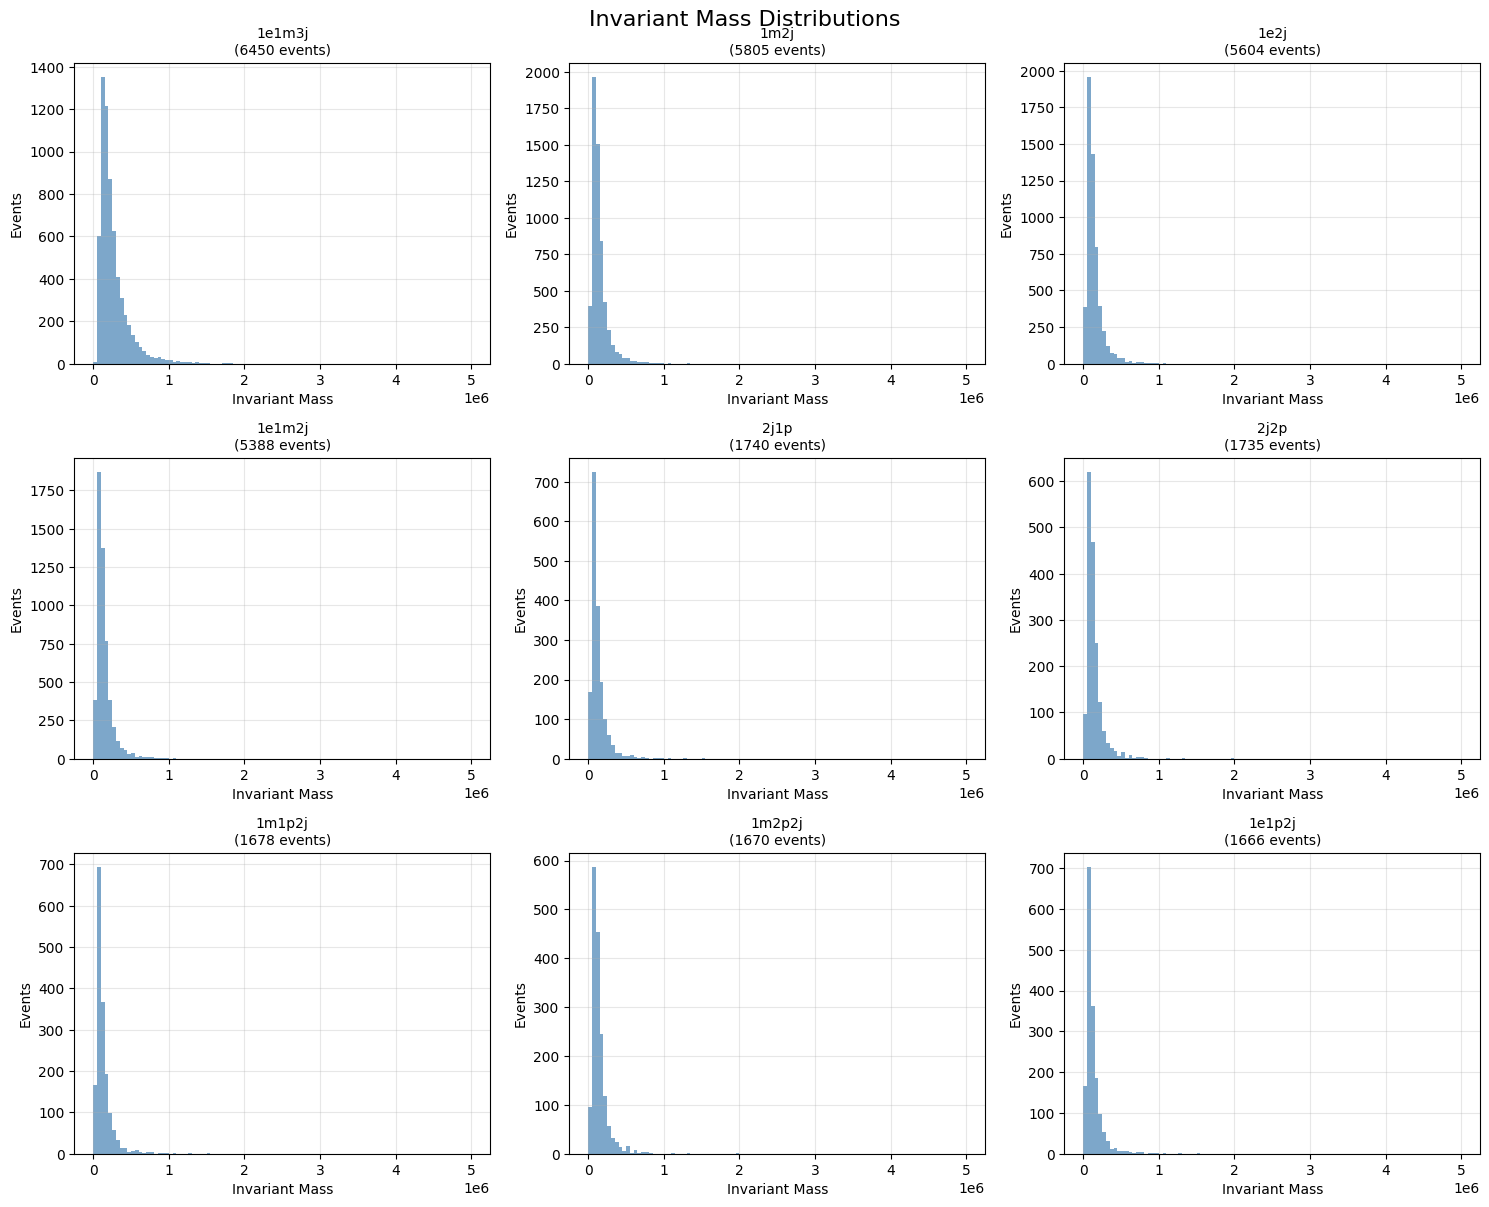

In [ ]:
# Histogram parameters
n_bins = 100
mass_min, mass_max = 0, 5000000

# Create 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

# Process each file
for idx, filename in enumerate(selected_files):
    file_path = os.path.join(config_inv_mass_calc["output_dir"], filename)
    inv_masses = np.load(file_path)
    
    # Create histogram
    bin_content, bin_edges = np.histogram(inv_masses, bins=n_bins, range=(mass_min, mass_max))
    bin_errors = np.sqrt(bin_content)
    
    # Plot on corresponding subplot
    ax = axes[idx]
    ax.hist(bin_edges[:-1], bins=bin_edges, weights=bin_content, alpha=0.7, color='steelblue')
    
    # Extract particle combination from filename
    # Format: root_<particles>_inv_mass.npy
    particle_combo = filename.split('_inv_mass')[0].split('.root_')[1]
    
    ax.set_xlabel('Invariant Mass')
    ax.set_ylabel('Events')
    ax.set_title(f'{particle_combo}\n({len(inv_masses)} events)', fontsize=10)
    ax.grid(True, alpha=0.3)
    
plt.tight_layout()
plt.suptitle('Invariant Mass Distributions', fontsize=16, y=1.002)
plt.show()